In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D 
from numpy import trapz
from sklearn.manifold import MDS
import statsmodels.api as sm
from sklearn.metrics import euclidean_distances
from statistics import mean, median, mode, stdev
from scipy.stats import skew
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from collections import Counter

## Gap hw to users (Global)

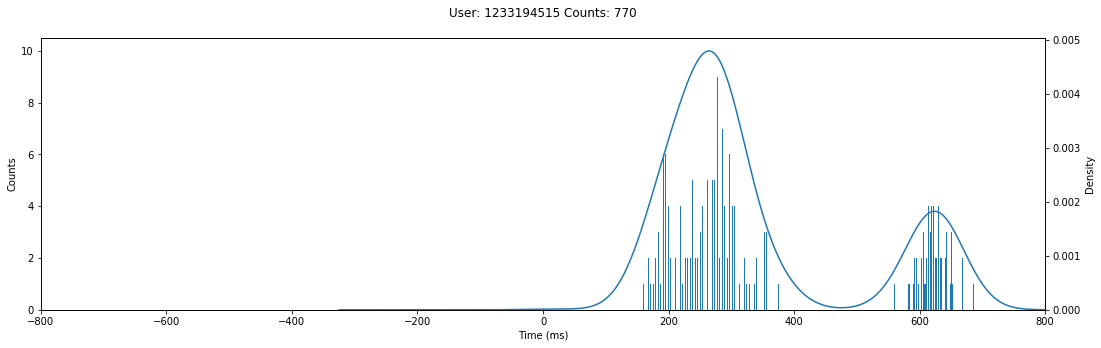

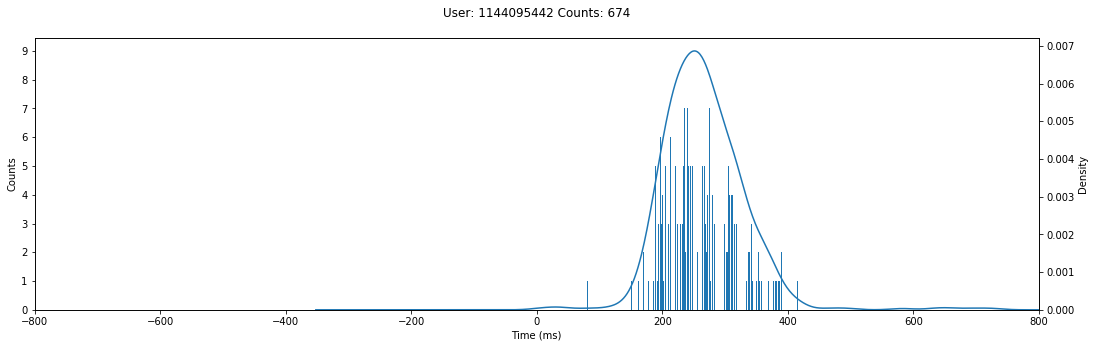

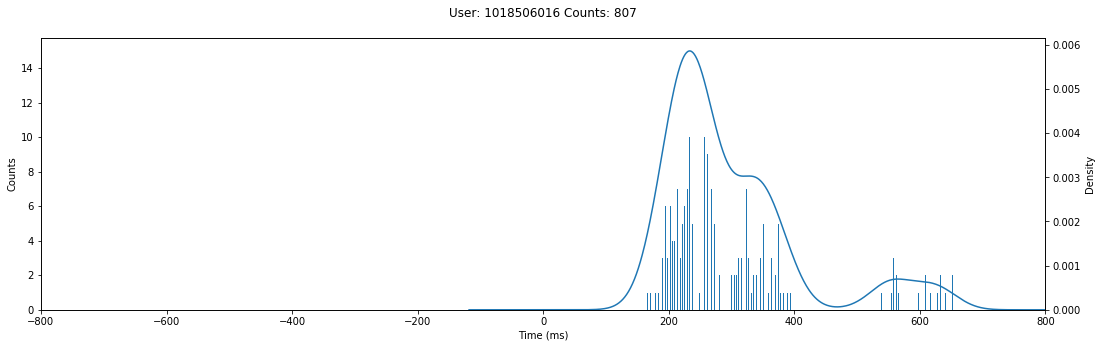

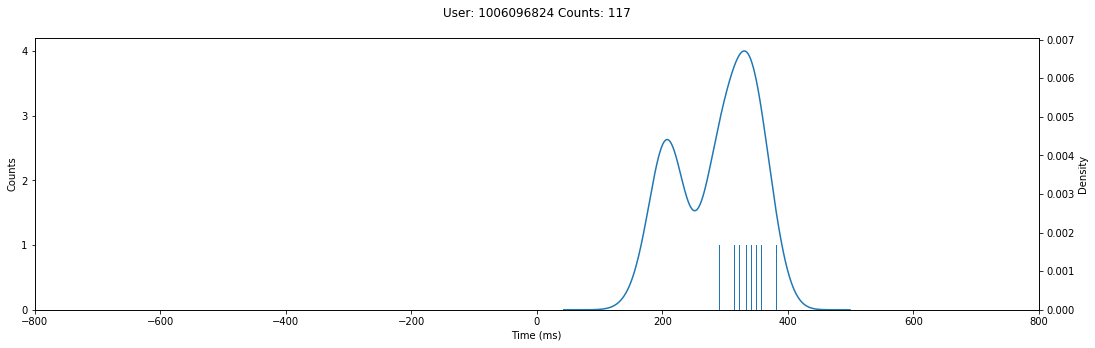

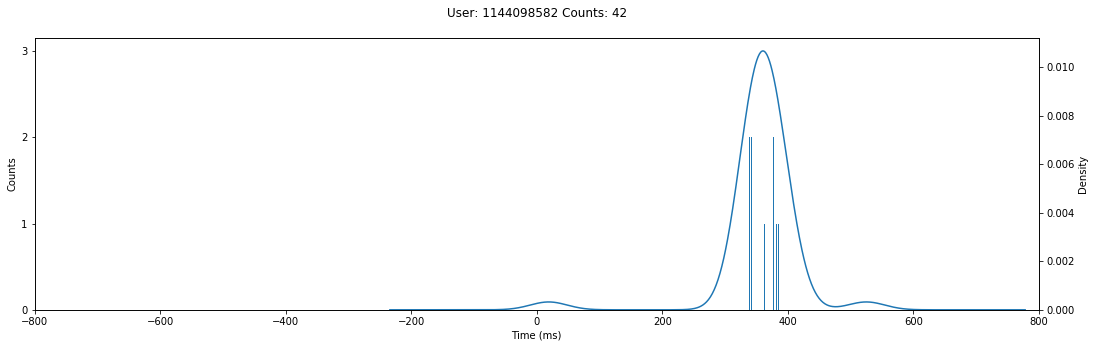

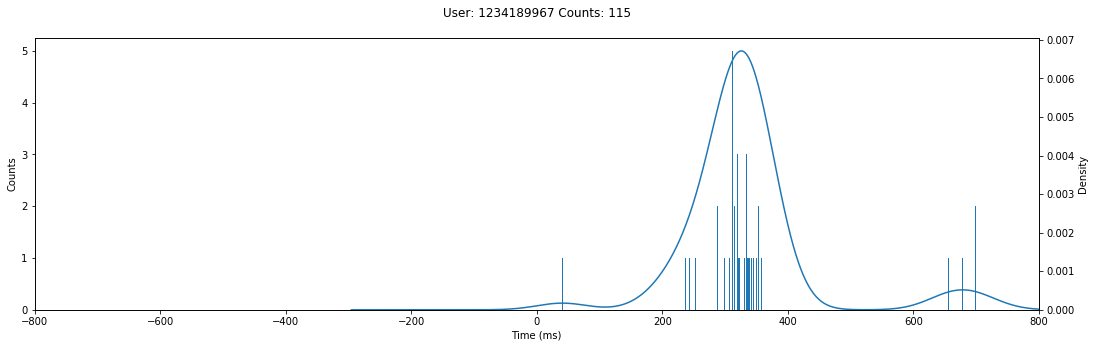

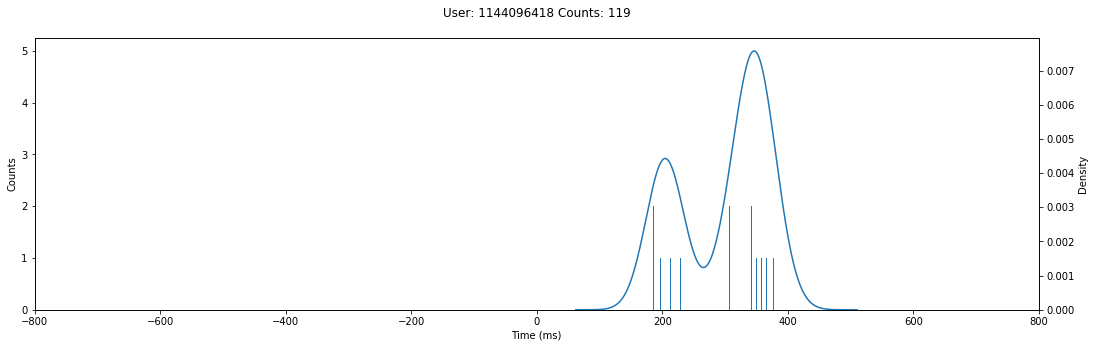

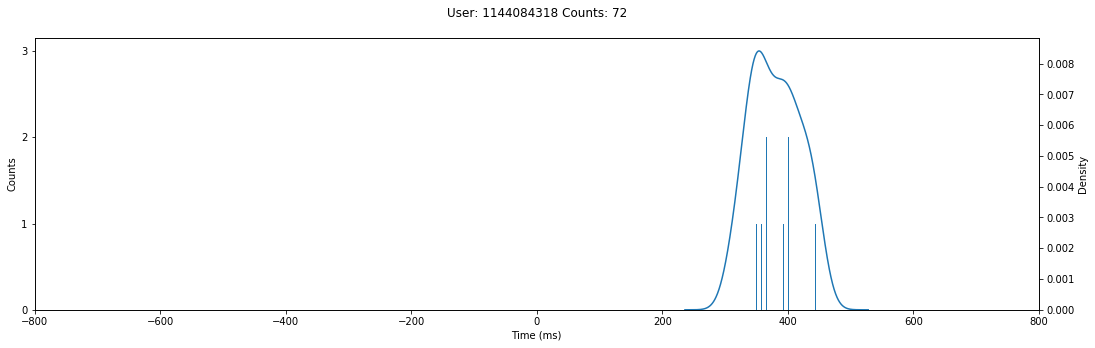

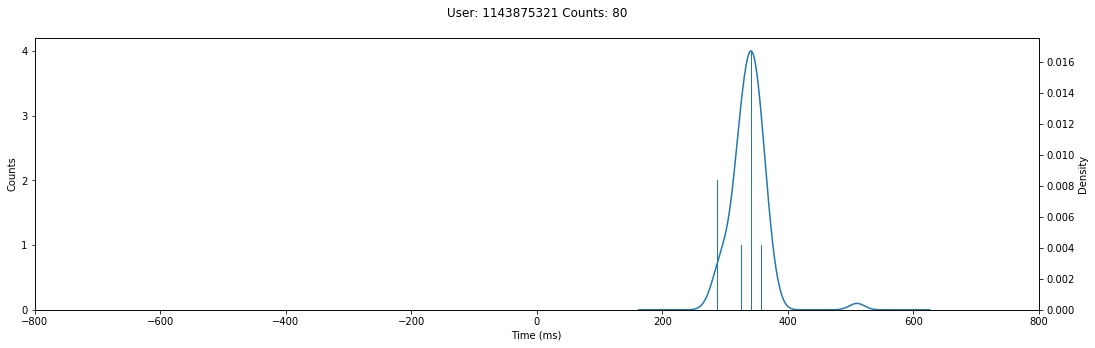

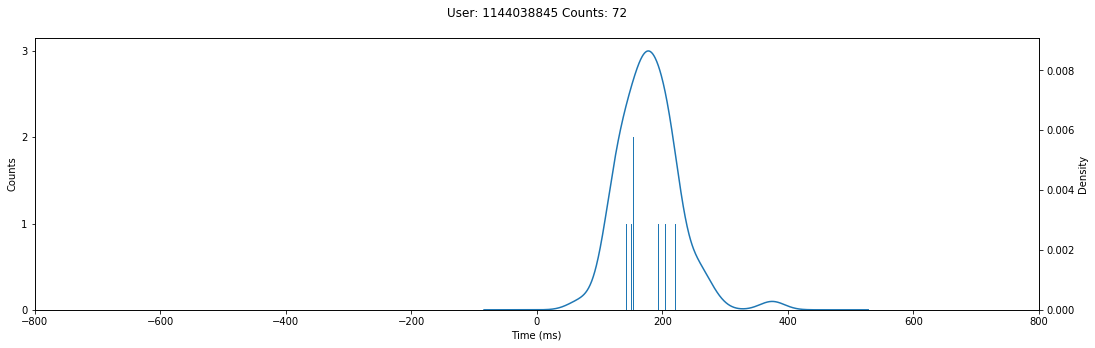

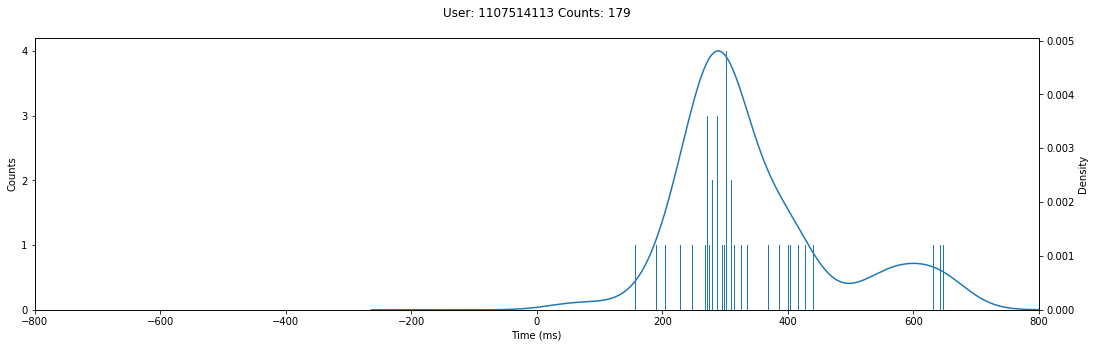

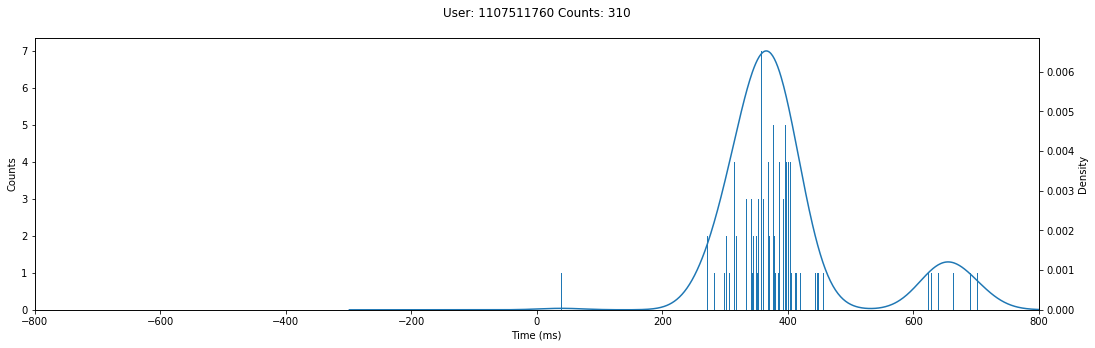

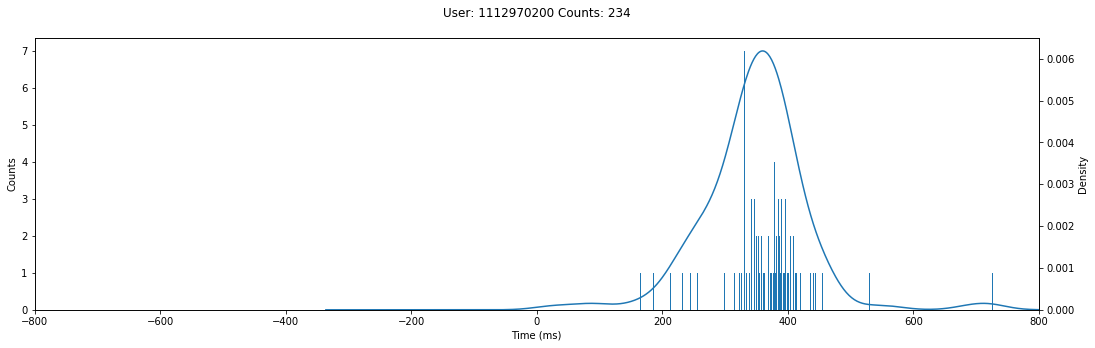

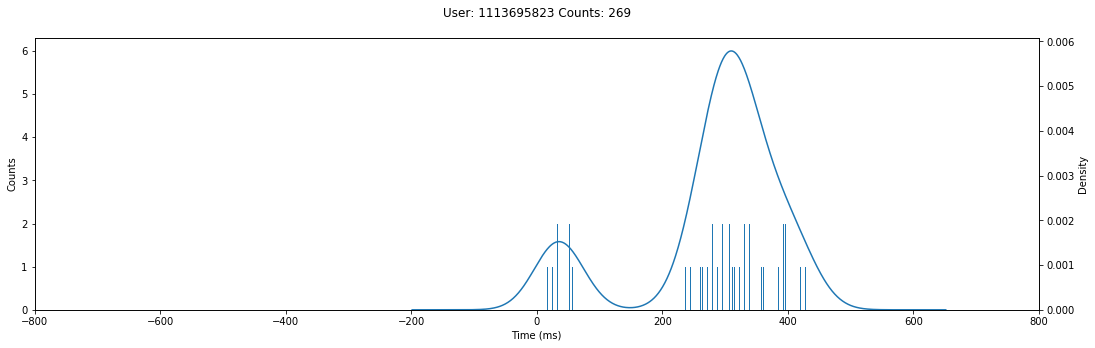

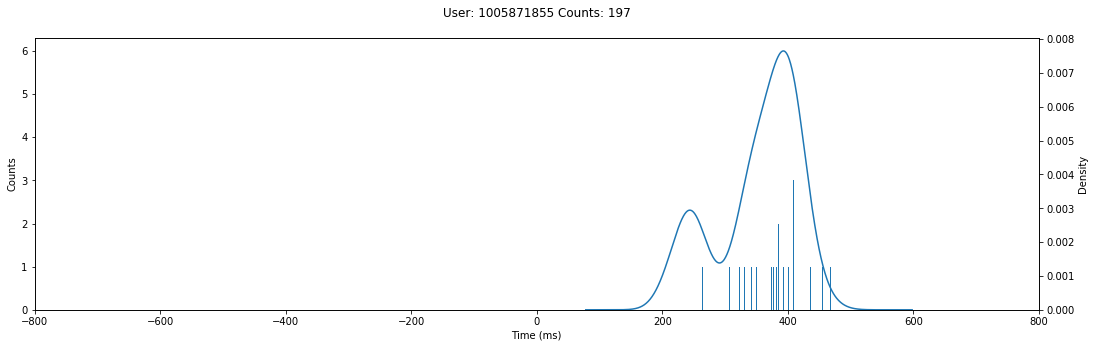

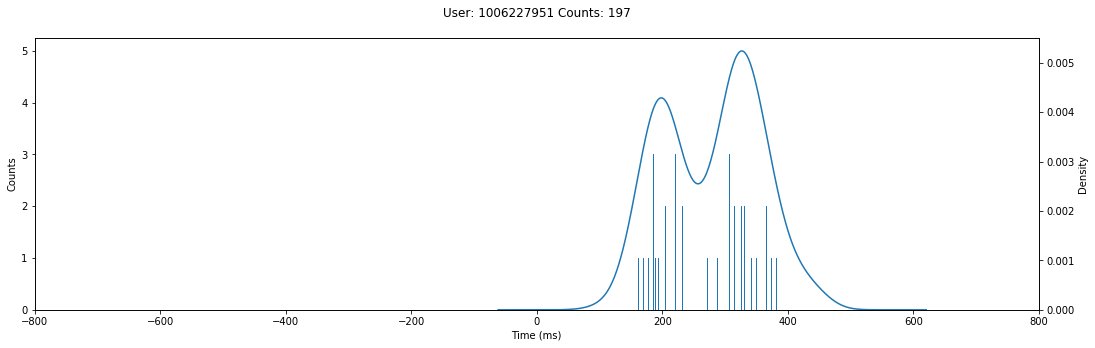

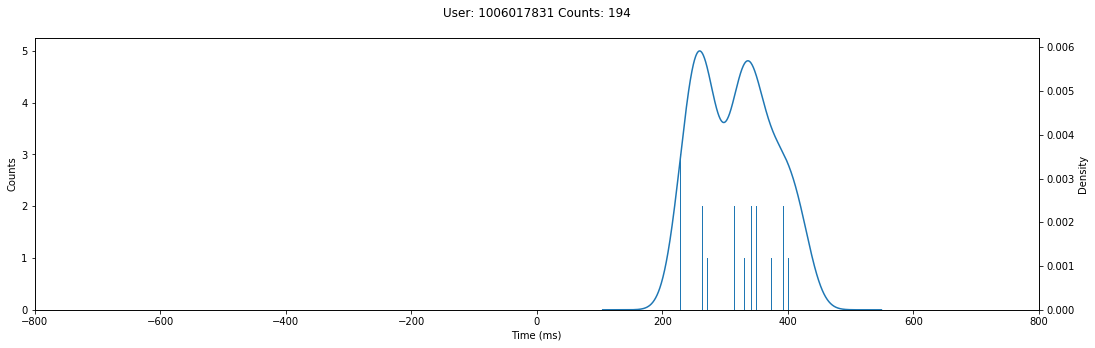

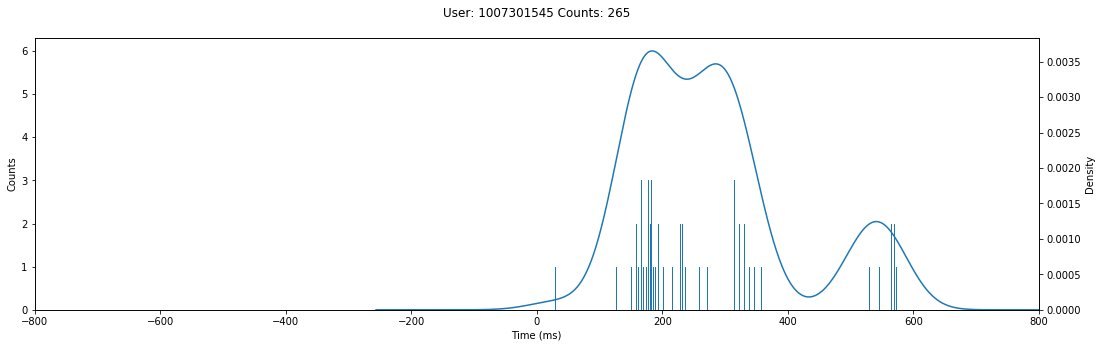

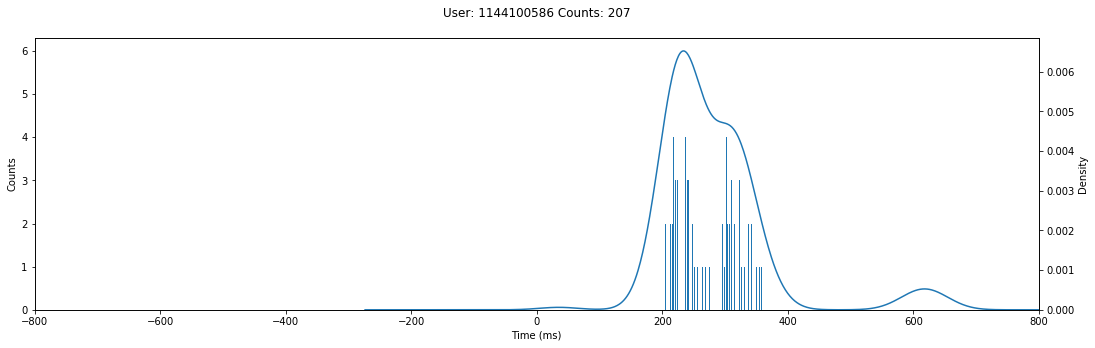

In [2]:
f = open("Data/Global_Hw/gap_hw.txt", "r")

global_dict_gaps = {}
users_kde = {}
sharp_dict = {}
std_dict = {}
sknss_dict = {}
mean_dict = {}
median_dict = {}
mode_dict = {}
dict_gap_hw = {}

for linea in f:

    list_gaps = []

    data = linea.split("_")
    values = data[1].split(" ")
    if len(values) >0 :
        for x in values:
            if (x != '\n') and (x != "") :
                list_gaps.append(float(x))
    global_dict_gaps[data[0]] = list_gaps
    
f.close()

del global_dict_gaps["1002956450"]
del global_dict_gaps["1143874902"]

for user in global_dict_gaps:
    
    global_count = 0
    global_count = len(global_dict_gaps[user])
    mean_dict[user] = mean(global_dict_gaps[user])
    median_dict[user] = median(global_dict_gaps[user])   
    c = Counter(global_dict_gaps[user])
    mode_dict[user] = c.most_common(1)[0][0]

    sharp_dict[user] = mean(global_dict_gaps[user]) / stdev(global_dict_gaps[user])
    std_dict[user] = stdev(global_dict_gaps[user])
    sknss_dict[user] = skew(global_dict_gaps[user])
    data = pd.DataFrame(global_dict_gaps[user])

    fig, ax1 = plt.subplots(1,1, figsize = (18,5))
    ax1.hist(global_dict_gaps[user], bins=1600)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax2 = ax1.twinx()


    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Counts')
    ax1.set_xlim(right=800, left=-800)

    kde = data.plot(kind='kde', ax=ax2, secondary_y=False)
    ax2.set_ylim(bottom=0)
    ax2.get_legend().remove()


    array_kde_y = kde.get_children()[0]._y
    array_kde_x = kde.get_children()[0]._x

    users_kde[user] = kde.get_children()[0]

    max_inx = np.argmax(array_kde_y)
    max_kde_value_y = array_kde_y[max_inx]
    max_kde_value_x = array_kde_x[max_inx]

    dict_gap_hw[user] = max_kde_value_x

    plt.title("User: "+user+" Counts: "+str(global_count)+"\n")
    plt.show()

### List of gap hw from users

In [3]:
for user in dict_gap_hw:
    print("User: "+ user+" Gap Hw: "+str(dict_gap_hw[user]))

User: 1233194515 Gap Hw: 264.66566566566564
User: 1144095442 Gap Hw: 251.72372372372377
User: 1018506016 Gap Hw: 233.55555555555554
User: 1006096824 Gap Hw: 330.56756756756755
User: 1144098582 Gap Hw: 360.63863863863867
User: 1234189967 Gap Hw: 326.467967967968
User: 1144096418 Gap Hw: 346.3163163163163
User: 1144084318 Gap Hw: 354.0860860860861
User: 1143875321 Gap Hw: 341.28328328328325
User: 1144038845 Gap Hw: 177.5855855855856
User: 1107514113 Gap Hw: 288.8123123123123
User: 1107511760 Gap Hw: 365.01351351351354
User: 1112970200 Gap Hw: 359.95195195195197
User: 1113695823 Gap Hw: 309.457957957958
User: 1005871855 Gap Hw: 392.91491491491496
User: 1006227951 Gap Hw: 326.9464464464465
User: 1006017831 Gap Hw: 259.2222222222222
User: 1007301545 Gap Hw: 184.31631631631637
User: 1144100586 Gap Hw: 234.18168168168165


## Gap hw to users (Individual)

In [4]:
f = open("Data/Individual_Hw/gap_hw.txt", "r")
dict_gaps = {}

for linea in f:

    list_gaps = []

    data = linea.split("_")
    values = data[2].split(" ")
    if len(values) >0 :
        for x in values:
            if (x != '\n') and (x != "") :
                list_gaps.append(float(x))
    dict_gaps[data[0]+"_"+data[1]] = list_gaps
    
f.close()

#dict_gap_hw = {}
for user in dict_gaps:
    data = pd.DataFrame(dict_gaps[user])
    
    
    #fig, ax1 = plt.subplots(1,1, figsize = (18,5))
    #ax1.hist(dict_gaps[user], bins=600)
    #ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
   
    #ax2 = ax1.twinx()
    
    
    #ax1.set_xlabel('Time (ms)')
    #ax1.set_ylabel('Counts')
    #ax1.set_xlim(right=800, left=-800)
    
    #kde = data.plot(kind='kde', ax=ax2, secondary_y=False)
    #ax2.set_ylim(bottom=0)
    #ax2.get_legend().remove()
    
    
    array_kde_y = kde.get_children()[0]._y
    array_kde_x = kde.get_children()[0]._x
    
    max_inx = np.argmax(array_kde_y)
    max_kde_value_y = array_kde_y[max_inx]
    max_kde_value_x = array_kde_x[max_inx]
    
    #dict_gap_hw[user] = max_kde_value_x
    
    title = user.split("_")
    date = title[1].split("-")
    date_title = date[0]+"/"+date[1]+"/2019"+" Hour: "+date[2].split("H")[1]+":"+date[3]
    #plt.title("User: "+title[0]+"\n"+"Date: "+ date_title+"\n")
    #plt.show()

### List of gap hw from users in the session

In [5]:
#for user in dict_gap_hw:
#    title = user.split("_")
#    date = title[1].split("-")
#    date_title = date[0]+"/"+date[1]+"/2019"+" Hour: "+date[2].split("H")[1]+":"+date[3]
#    print("User: "+title[0]+"| Date: "+ date_title+"| Gap Hw: "+str(dict_gap_hw[user]))

# Visualization of mean, median, mode, gap hw and difference btw 731 and users

In [7]:
diff = pd.read_csv("difference.txt")
diff[diff.User== 1006017831].Difference
table_dict = {}

diff_list = []
aux_dict = diff.set_index('User')['Difference'].to_dict() 
for user in dict_gap_hw.keys():
    if int(user) in aux_dict.keys():
        aux = aux_dict[int(user)]
        diff_list.append(aux)
    else:
        diff_list.append(0)
        print(user+" Not found")
diff_list


1234189967 Not found


[2.9819819819820172,
 1.3498498498498748,
 0.8703703703704377,
 0.6621621621621898,
 0.2322322322322634,
 0,
 8.195195195195197,
 2.129129129129069,
 1.6306306306306624,
 10.734234234234236,
 14.849349349349268,
 3.7367367367367024,
 0.33033033033029824,
 2.581081081081038,
 0.10560560560566046,
 2.528028028027961,
 2.076076076076106,
 1.6771771771771002,
 0.6671671671671221]

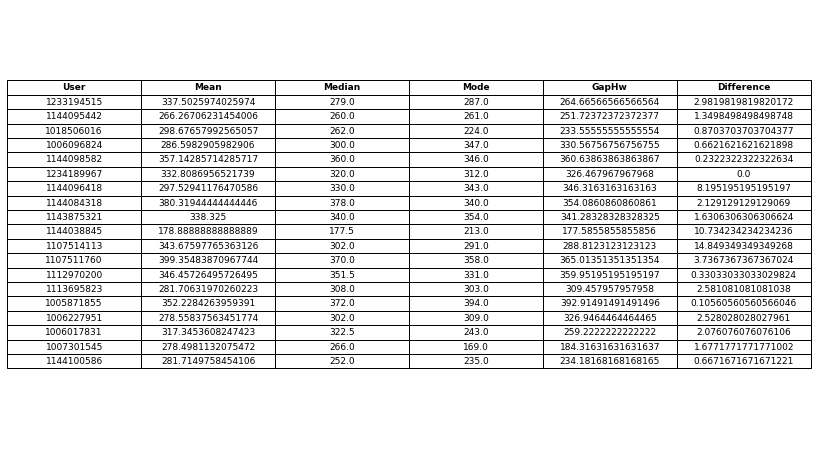

In [8]:
table_dict["User"] = list(dict_gap_hw.keys())
table_dict["Mean"] = list(mean_dict.values())
table_dict["Median"] = list(median_dict.values())
table_dict["Mode"] = list(mode_dict.values())
table_dict["GapHw"] = list(dict_gap_hw.values())
table_dict["Difference"] = diff_list

df = pd.DataFrame(table_dict)

fig, ax1 = plt.subplots(1,1, figsize = (12,8))
ax1.axis('off')
ax1.axis('tight')
table = ax1.table(cellText= df.values,
          colLabels=df.columns,
          loc = 'center',
          cellLoc='center')
table.set_fontsize(18)
table.scale(1.2, 1.2)
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
plt.show()

## Mean

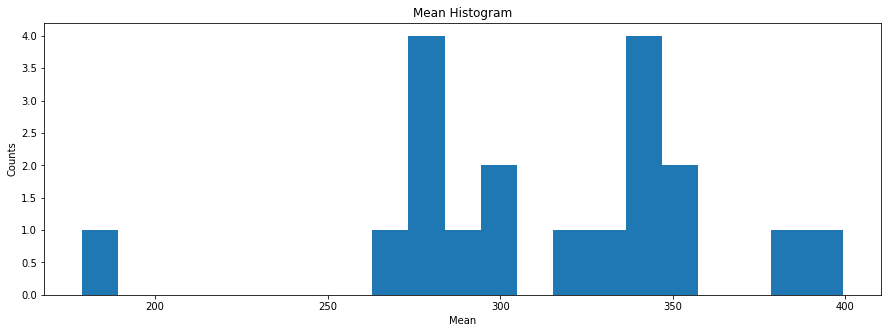

In [9]:
name_col = "Mean"
fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.hist(x= df[name_col], bins=21)
ax.set_xlabel(name_col)
ax.set_ylabel("Counts")
ax.set_title(name_col+" Histogram")
plt.show()

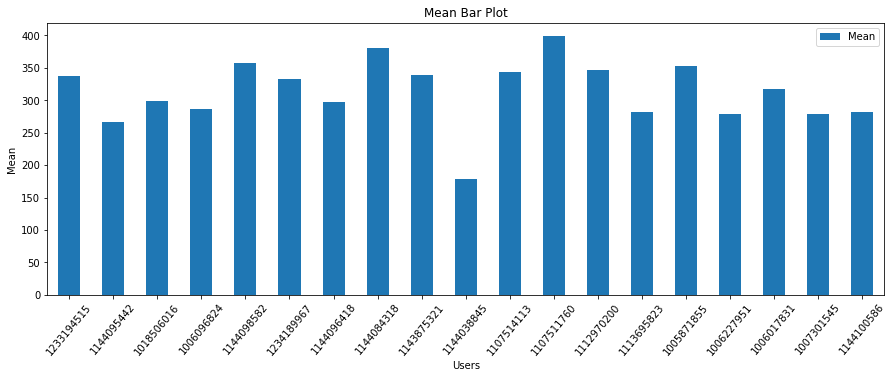

In [10]:
ax = df.plot.bar(x='User', y=name_col, rot=50, figsize=(15,5))
ax.set_xlabel("Users")
ax.set_ylabel(name_col)
ax.set_title(name_col+" Bar Plot")
plt.show()

## Mode

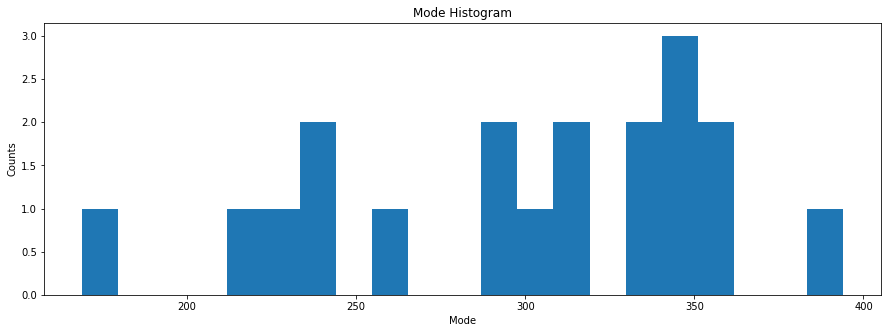

In [11]:
name_col = "Mode"
fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.hist(x= df[name_col], bins=21)
ax.set_xlabel(name_col)
ax.set_ylabel("Counts")
ax.set_title(name_col+" Histogram")
plt.show()

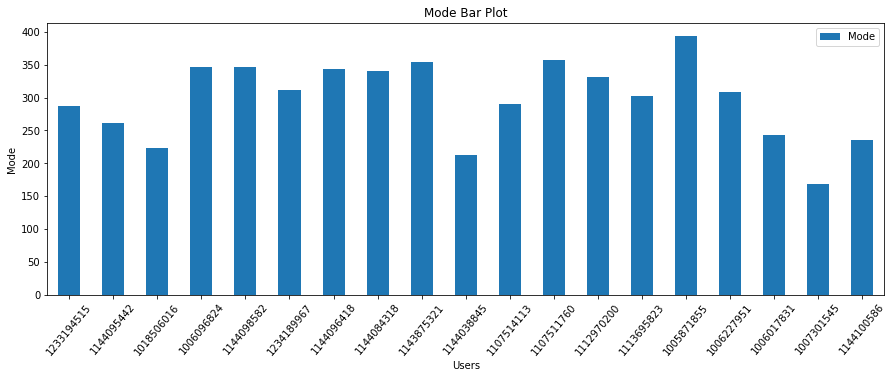

In [12]:
ax = df.plot.bar(x='User', y=name_col, rot=50, figsize=(15,5))
ax.set_xlabel("Users")
ax.set_ylabel(name_col)
ax.set_title(name_col+" Bar Plot")
plt.show()

## Median

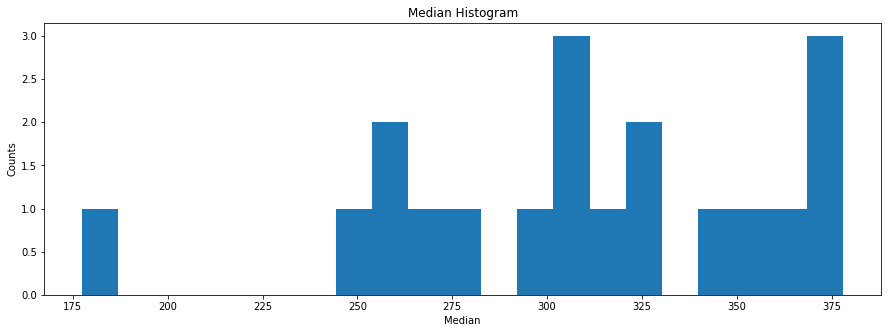

In [13]:
name_col = "Median"
fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.hist(x= df[name_col], bins=21)
ax.set_xlabel(name_col)
ax.set_ylabel("Counts")
ax.set_title(name_col+" Histogram")
plt.show()

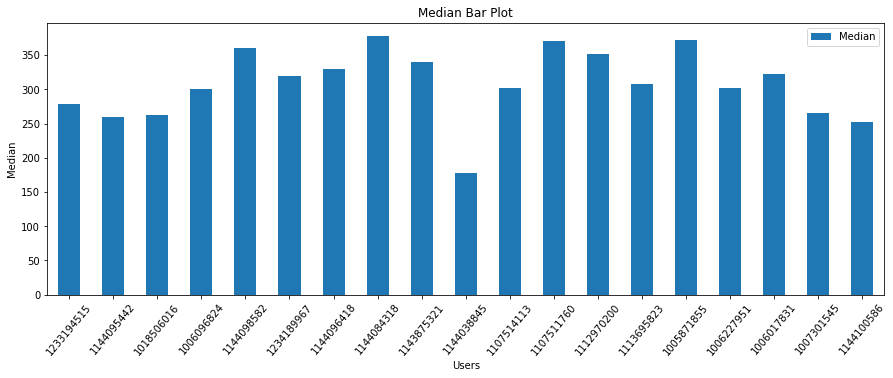

In [14]:
ax = df.plot.bar(x='User', y=name_col, rot=50, figsize=(15,5))
ax.set_xlabel("Users")
ax.set_ylabel(name_col)
ax.set_title(name_col+" Bar Plot")
plt.show()

## GapHw

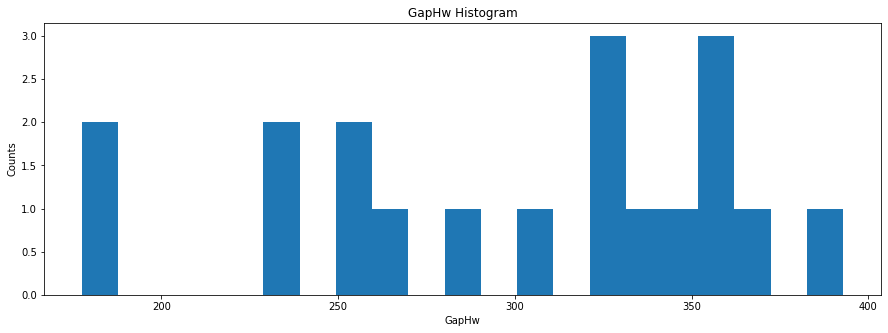

In [15]:
name_col = "GapHw"
fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.hist(x= df[name_col], bins=21)
ax.set_xlabel(name_col)
ax.set_ylabel("Counts")
ax.set_title(name_col+" Histogram")
plt.show()

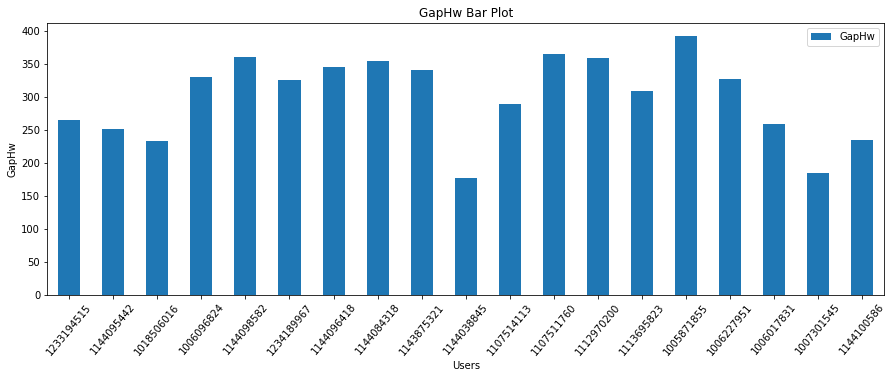

In [16]:
ax = df.plot.bar(x='User', y=name_col, rot=50, figsize=(15,5))
ax.set_xlabel("Users")
ax.set_ylabel(name_col)
ax.set_title(name_col+" Bar Plot")
plt.show()

## Difference

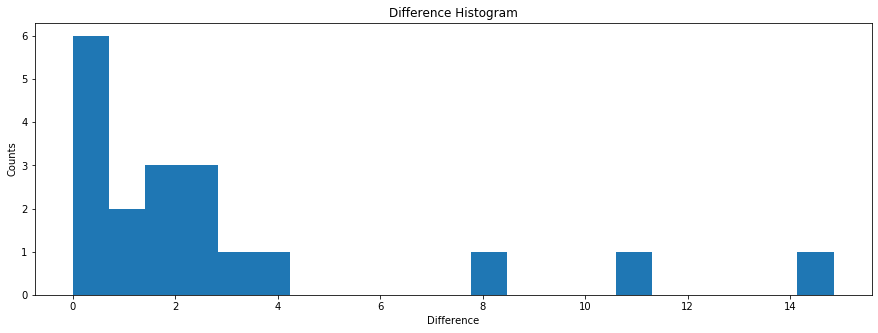

In [17]:
name_col = "Difference"
fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.hist(x= df[name_col], bins=21)
ax.set_xlabel(name_col)
ax.set_ylabel("Counts")
ax.set_title(name_col+" Histogram")
plt.show()

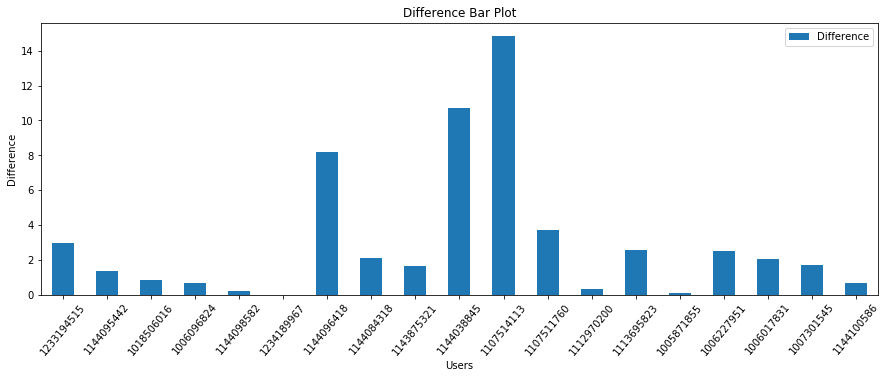

In [18]:
ax = df.plot.bar(x='User', y=name_col, rot=50, figsize=(15,5))
ax.set_xlabel("Users")
ax.set_ylabel(name_col)
ax.set_title(name_col+" Bar Plot")
plt.show()

### Mean for all the variables

In [19]:
print("Column     Mean")
for col in df.columns:
    if col != "User":
        print(col+"     "+str(round(df[col].mean(),4)))

Column     Mean
Mean     313.3473
Median     308.0263
Mode     297.8947
GapHw     300.4057
Difference     3.0178


# Find the area of the overlap comparing two users

Define two methods to find the overlap between two functions

In [20]:
# 1233194515  1144095442

def get_y_from_x(x_values, y_values, x):
    
    find = True
    index = 0
    while(find):
        
        if index+1 >= len(x_values):
            find = False
            return None
        
        if round(x_values[index], 0) == round(x, 0):
            return y_values[index]
            find = False
        
        index += 1
        
    
def find_line(x_user1, y_user1, x_user2, y_user2):
    
    dict_values = {}

    for index in range(0, len(x_user1)):
        # search if in user 2 exists the sale value of x that user 1 
        value_y = get_y_from_x(x_user2, y_user2, x_user1[index])
        if value_y != None:
            if value_y >= y_user1[index]:
                dict_values[x_user1[index]] = y_user1[index]
            else:
                dict_values[x_user1[index]] = value_y
            
    return list(dict_values.keys()), list(dict_values.values())

Create the matrix

In [21]:
users_ids = list(global_dict_gaps.keys())
user_name = {}
indx=0
for x in users_ids:
    user_name[indx] = x
    indx += 1
users_matrix = [[0 for x in range(len(users_ids))] for y in range(len(users_ids))]  

Method that compare two users and find the overlap

In [22]:
for user_1 in range(0, len(users_ids)):
    for user_2 in range(0, len(users_ids)):
        
        if user_1 == user_2:
            users_matrix[user_1][user_2] = 1
        else:
            us_1_name = user_name[user_1]
            us_2_name = user_name[user_2]
            
            usr1 = global_dict_gaps[us_1_name]
            usr2 = global_dict_gaps[us_2_name]

            kde_usr1 = sm.nonparametric.KDEUnivariate(usr1)
            kde_usr1.fit()

            kde_usr2 = sm.nonparametric.KDEUnivariate(usr2)
            kde_usr2.fit()

            #fig, ax = plt.subplots(1, 1, figsize = (18,5))

            x, y = find_line(kde_usr1.support, kde_usr1.density, kde_usr2.support, kde_usr2.density)

            #line = Line2D(x, y, color="red", linestyle = '--', linewidth = 2)

            #ax.plot(kde_usr1.support, kde_usr1.density, color="yellow", lw=1)
            #ax.plot(kde_usr2.support, kde_usr2.density, color="blue", lw=1)
            #ax.add_line(line)
            #ax.set_xlim(-800, 800)
            #ax.fill_between(x, y, 0 , facecolor='red')
            area_rd = trapz(x=x, y=y)
            
            users_matrix[user_1][user_2] = area_rd
            
            #ax.set_xlabel('Time (ms)')
            #ax.set_ylabel('Density')
            #plt.title("User Yellow: "+us_1_name+"\n"+"User Blue: "+ us_2_name +"\n"+"Area: "+str(area_rd)+"\n")
            
            #plt.show()

# MDS

In [23]:
row = 0
for x in range(len(users_matrix)):
    act = row
    while(act < len(users_matrix)):
        
        aux = users_matrix[x][act]
        users_matrix[act][x] = aux
        aux2=users_matrix[act][x]
        #print(str(x)+" "+str(act)+" = "+str(aux)+" | "+str(act)+" "+str(x)+" = "+str(aux2))
        act += 1
        
    row += 1

## Sharp Ratio

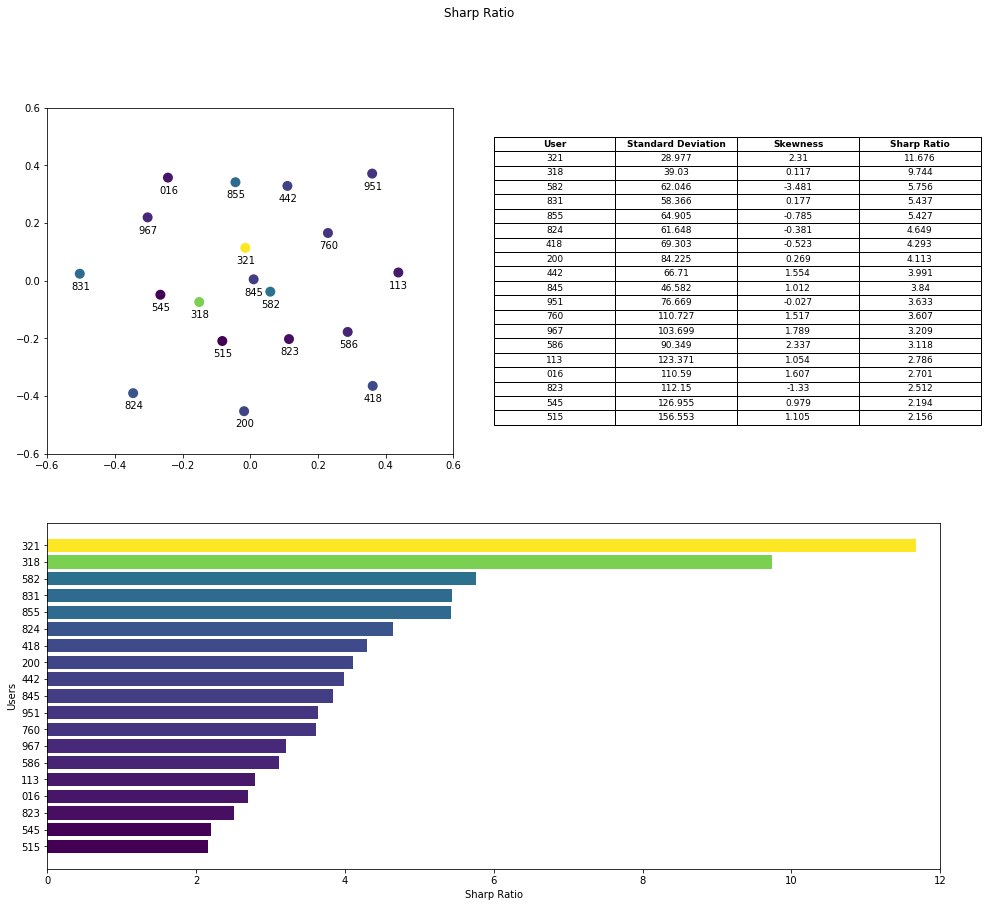

In [24]:
table_matrix = [[0 for y in range(4)]for x in range(len(users_ids))]
indx = 0

for user in sharp_dict.keys():
    table_matrix[indx][0] = user[len(user)-3:]
    table_matrix[indx][1] = round(std_dict[user],3)
    table_matrix[indx][2] = round(sknss_dict[user],3)
    table_matrix[indx][3] = round(sharp_dict[user],3)
    indx += 1

aux = np.array(table_matrix)
aux = aux[aux[:,3].argsort()]
df = pd.DataFrame(aux)
df[1] = df[1].astype(float) 
df[2] = df[2].astype(float) 
df[3] = df[3].astype(float) 
df = df.sort_values([3], ascending=[False])

sharp_array = list(sharp_dict.values())
    
columns = ["User","Standard Deviation", "Skewness", "Sharp Ratio"]

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=6)
pos = mds.fit(users_matrix)

coords = pos.embedding_

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,14))
ax1 = plt.subplot(221)

s=100
c= ax1.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=s, lw=0, label='MDS', c=sharp_array, cmap='viridis')

for label, x, y in zip(users_ids, coords[:, 0], coords[:, 1]):
    ax1.annotate(
        label[len(label)-3:],
        xy = (x, y), xytext = (10, -18),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

#plt.legend(scatterpoints=1, loc='best', shadow=False)
ax1.set_xlim(-0.6, 0.6)
ax1.set_ylim(-0.6, 0.6)


ax2 = plt.subplot(222)
ax2.axis('off')
ax2.axis('tight')
table = ax2.table(cellText= df.values,
          colLabels=columns,
          loc = 'center',
          cellLoc='center')
table.set_fontsize(18)
table.scale(1.2, 1.2)
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
        
        

ax3 = plt.subplot(212)
ax3.set_xlim(0, 12)
ax3.set_ylabel("Users")
ax3.set_xlabel("Sharp Ratio")
        
df = df.sort_values([3], ascending=[True])
color_list = []

norm = mpl.colors.Normalize(vmin=min(df[3].values), vmax=max(df[3].values))

for act in df[3].values:
    color_list.append(mpl.cm.viridis(norm(act)))
ax = plt.barh(df[0].values, df[3].values, data=df, color=color_list)


plt.suptitle("Sharp Ratio")
plt.show()

## Skewness

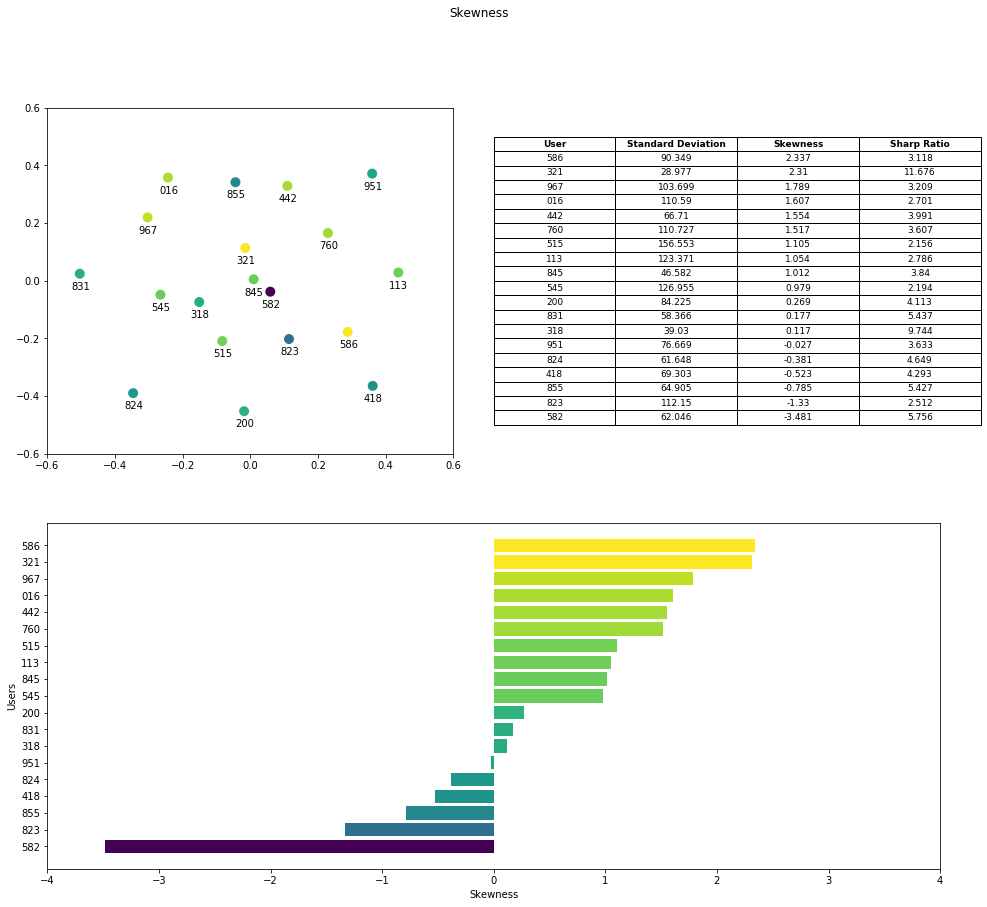

In [25]:
table_matrix = [[0 for y in range(4)]for x in range(len(users_ids))]
indx = 0

for user in sharp_dict.keys():
    table_matrix[indx][0] = user[len(user)-3:]
    table_matrix[indx][1] = round(std_dict[user],3)
    table_matrix[indx][2] = round(sknss_dict[user],3)
    table_matrix[indx][3] = round(sharp_dict[user],3)
    indx += 1

aux = np.array(table_matrix)
aux = aux[aux[:,3].argsort()]
df = pd.DataFrame(aux)
df[1] = df[1].astype(float) 
df[2] = df[2].astype(float) 
df[3] = df[3].astype(float) 
df = df.sort_values([2], ascending=[False])

skns_array = list(sknss_dict.values())
    
columns = ["User","Standard Deviation", "Skewness", "Sharp Ratio"]

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=6)
pos = mds.fit(users_matrix)

coords = pos.embedding_

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,14))
ax1 = plt.subplot(221)

s=100

viridis = mpl.cm.get_cmap('viridis_r', len(users_ids))
c= ax1.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=s, lw=0, label='MDS', c=skns_array, cmap='viridis')
#c= ax1.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=s, lw=0, label='MDS', c=viridis.colors)

for label, x, y in zip(users_ids, coords[:, 0], coords[:, 1]):
    ax1.annotate(
        label[len(label)-3:],
        xy = (x, y), xytext = (10, -18),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

#plt.legend(scatterpoints=1, loc='best', shadow=False)
ax1.set_xlim(-0.6, 0.6)
ax1.set_ylim(-0.6, 0.6)


ax2 = plt.subplot(222)
ax2.axis('off')
ax2.axis('tight')
table = ax2.table(cellText= df.values,
          colLabels=columns,
          loc = 'center',
          cellLoc='center')
table.set_fontsize(18)
table.scale(1.2, 1.2)
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
        

ax3 = plt.subplot(212)
     
ax3.set_xlim(-4, 4)
ax3.set_ylabel("Users")
ax3.set_xlabel("Skewness")

df = df.sort_values([2], ascending=[True])
color_list = []

norm = mpl.colors.Normalize(vmin=min(df[2].values), vmax=max(df[2].values))

for act in df[2].values:
    color_list.append(mpl.cm.viridis(norm(act)))

ax3 = plt.barh(df[0].values, df[2].values, data=df, color=color_list)

plt.suptitle("Skewness")
plt.show()

## Standard deviation

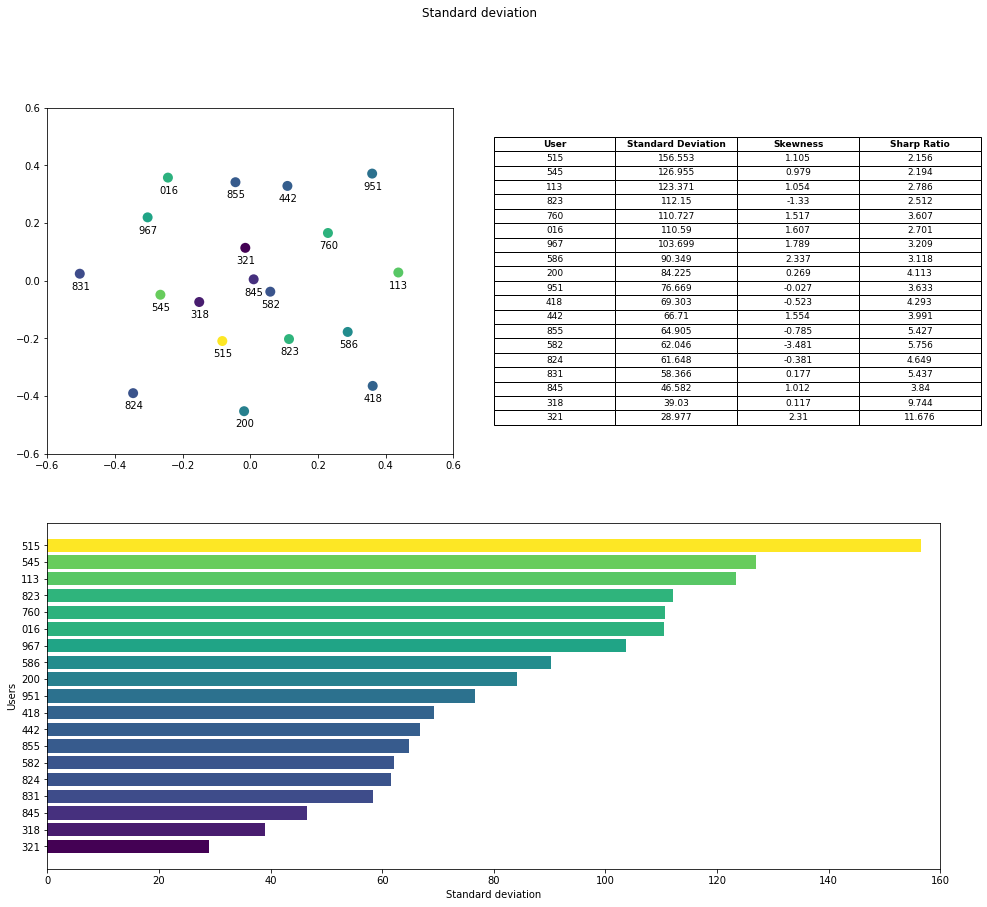

In [26]:
table_matrix = [[0 for y in range(4)]for x in range(len(users_ids))]
indx = 0

for user in sharp_dict.keys():
    table_matrix[indx][0] = user[len(user)-3:]
    table_matrix[indx][1] = round(std_dict[user],3)
    table_matrix[indx][2] = round(sknss_dict[user],3)
    table_matrix[indx][3] = round(sharp_dict[user],3)
    indx += 1

aux = np.array(table_matrix)
aux = aux[aux[:,3].argsort()]
df = pd.DataFrame(aux)
df[1] = df[1].astype(float) 
df[2] = df[2].astype(float) 
df[3] = df[3].astype(float) 
df = df.sort_values([1], ascending=[False])

std_array = list(std_dict.values())
    
columns = ["User","Standard Deviation", "Skewness", "Sharp Ratio"]

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=6)
pos = mds.fit(users_matrix)

coords = pos.embedding_

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,14))

ax1 = plt.subplot(221)
#plt.subplots_adjust(bottom = 0.1)
s=100
c= ax1.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=s, lw=0, label='MDS', c=std_array, cmap="viridis")

for label, x, y in zip(users_ids, coords[:, 0], coords[:, 1]):
    ax1.annotate(
        label[len(label)-3:],
        xy = (x, y), xytext = (10, -18),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

#plt.legend(scatterpoints=1, loc='best', shadow=False)
ax1.set_xlim(-0.6, 0.6)
ax1.set_ylim(-0.6, 0.6)

ax2 = plt.subplot(222)

ax2.axis('off')
ax2.axis('tight')
table = ax2.table(cellText= df.values,
          colLabels=columns,
          loc = 'center',
          cellLoc='center')
table.set_fontsize(18)
table.scale(1.2, 1.2)
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

        
ax3 = plt.subplot(212)

df = df.sort_values([1], ascending=[True])
color_list = []

norm = mpl.colors.Normalize(vmin=min(df[1].values), vmax=max(df[1].values))

for act in df[1].values:
    color_list.append(mpl.cm.viridis(norm(act)))

    
ax3.set_xlim(0, 160)
ax3.set_ylabel("Users")
ax3.set_xlabel("Standard deviation")

ax3 = plt.barh(df[0].values, df[1].values, data=df, color=color_list)
plt.suptitle("Standard deviation")
plt.show()